Working, wait for figure after count to 10
1
2
3
4
5
6
7
8
9
10


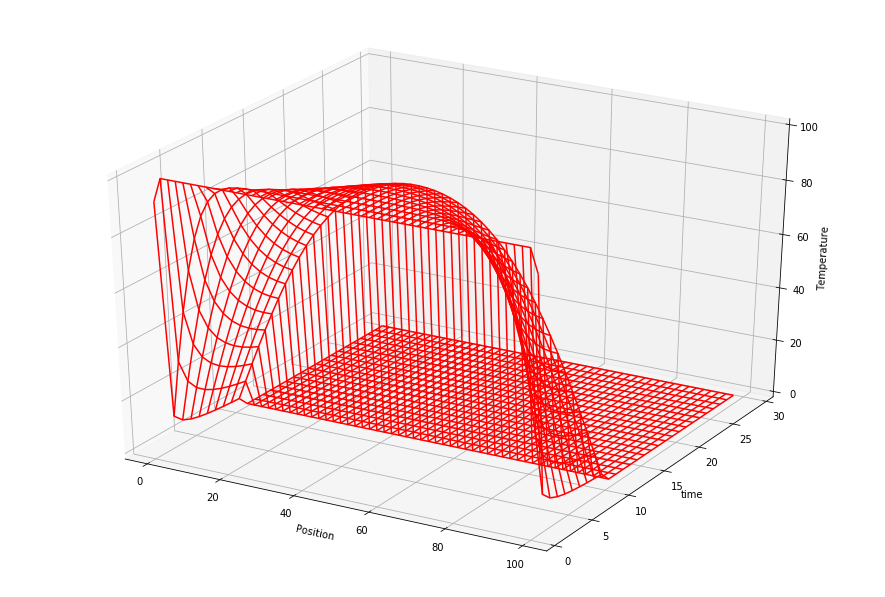

finished


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
%matplotlib inline

Nx    = 101      
Nt    = 3000   
Dx    = 0.03  
Dt    = 0.9                                                              
KAPPA = 210.
SPH   = 900.
RHO   = 2700.                                                     
T     = zeros( (Nx, 2), float);  
Tpl   = zeros( (Nx, 31), float)  
                                     
print("Working, wait for figure after count to 10")

for ix in range (1, Nx - 1):  
    T[ix, 0] = 100.0;               

T[0,0] = 0.0  
T[0,1] = 0.                           
T[Nx-1,0] = 0.
T[Nx-1,1] = 0.0

cons = KAPPA/(SPH*RHO)*Dt/(Dx*Dx);                             # constant
m = 1                                                           # counter

for t in range (1, Nt):                                  
   
   for ix in range (1, Nx - 1):                       
      T[ix, 1] = T[ix, 0] +  cons*(T[ix+1, 0] + T[ix-1, 0] - 2.*T[ix,0])                                                        
   
   if (t % 300 == 0 or t == 1):                            # Every 300 steps
        for ix in range (1, Nx - 1, 2): Tpl[ix, m] = T[ix, 1]   
        print(m)   
        m = m + 1                        
   
   for ix in range (1, Nx - 1):  
        T[ix, 0] = T[ix, 1] 


x = list(range(1, Nx - 1, 2))                       # Plot alternate pts
y = list(range(1, 30))                       
X, Y = np.meshgrid(x, y)                       

def functz(Tpl):                            
    z = Tpl[X, Y]       
    return z

Z = functz(Tpl)              
fig = plt.figure(figsize=(12,8))                                          # Create figure
ax = Axes3D(fig)                                              
ax.plot_wireframe(X, Y, Z, color = 'r')                    
ax.set_xlabel('Position')                                     
ax.set_ylabel('time')
ax.set_zlabel('Temperature')
p.show()                               
print("finished")                               
